In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warnings Libraries
import warnings 
warnings.filterwarnings('ignore')

# Import Loggong Files
import logging
logging.basicConfig(level= logging.INFO,
                    filemode= 'w',
                    filename= 'model.log',
                    format= '%(asctime)s %(levelname)s %(message)s',force=True
                    )

# Import Stats Scipy Library
import scipy.stats as stats

In [2]:
# Data Import Using Pandas Function

url = 'https://raw.githubusercontent.com/mukeshmagar543/Heart_Disease_MLModel/refs/heads/main/heart-disease.csv'

df = pd.read_csv(url)

df.sample(frac= 1) # Shuffle Dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [3]:
# Checking Data Shape and Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
logging.info('Dataset Uploaded Sucessfully')

In [5]:
# Checking Descriptive Stats
# Univariate Analysis
from collections import OrderedDict

stats = []

for i in df:
    heart_stats = OrderedDict({
        'Feature' : i,
        'Maximum' : df[i].max(),
        'Minimum' : df[i].min(),
        'Mean' : df[i].mean(),
        '25%' : df[i].quantile(0.25),
        'Median' : df[i].quantile(0.50),
        '75%' : df[i].quantile(0.75),
        'Kurtosis' : df[i].kurt(),
        'Skewness' :  df[i].skew(),
        'Standard Deviation' : df[i].std()
    })

    stats.append(heart_stats)

    report = pd.DataFrame(stats)

report

,Feature,Maximum,Minimum,Mean,25%,Median,75%,Kurtosis,Skewness,Standard Deviation
0,age,77.0,29.0,54.366337,47.5,55.0,61.0,-0.542167,-0.202463,9.082101
1,sex,1.0,0.0,0.683168,0.0,1.0,1.0,-1.382961,-0.791335,0.466011
2,cp,3.0,0.0,0.966997,0.0,1.0,2.0,-1.193071,0.484732,1.032052
3,trestbps,200.0,94.0,131.623762,120.0,130.0,140.0,0.929054,0.713768,17.538143
4,chol,564.0,126.0,246.264026,211.0,240.0,274.5,4.505423,1.143401,51.830751
5,fbs,1.0,0.0,0.148515,0.0,0.0,0.0,1.959678,1.986652,0.356198
6,restecg,2.0,0.0,0.528053,0.0,1.0,1.0,-1.362673,0.162522,0.525860
7,thalach,202.0,71.0,149.646865,133.5,153.0,166.0,-0.061970,-0.537410,22.905161
8,exang,1.0,0.0,0.326733,0.0,0.0,1.0,-1.458317,0.742532,0.469794
9,oldpeak,6.2,0.0,1.039604,0.0,0.8,1.6,1.575813,1.269720,1.161075


In [6]:
logging.info('The above Dataset is Non Normal Distributed')

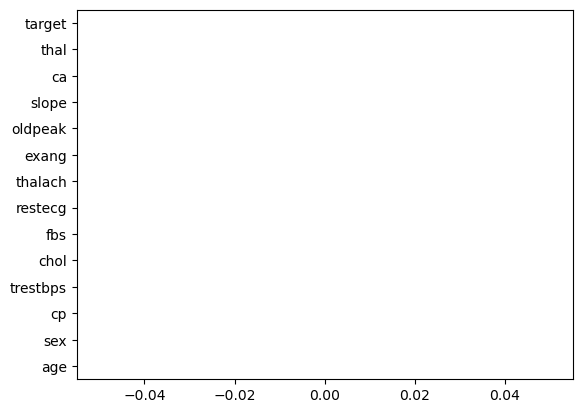

In [7]:
# Checking missing information if any using Graphical Method
df.isnull().sum().plot(kind = 'barh')
plt.show()

In [8]:
# Checking Output i.e. Target Column for Data Distribution
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [9]:
# Balancing The Target Column Using SMOTE Technique

# Step 1: Divide Dataset into X and y

# X: Independant Column y:Target Column  

X = df.drop(columns= 'target') # Independant Column: 13

y = df['target'] # Target Coiumn: 1

# Step 2: Split the Dataset into Train and Test
# 100%  ----> 70% Data is used for training [Seen Data] and 30% Data [Unseen Data] is used for Testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.30,random_state= 9999)

y_test

# Step 3: Normalization Scaling Technique
# Using MinMax Scalar ---> Dataset having Minor Outliers
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Step 4: Using SMOTE Technique to Balance Target Column

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

# Step 5: After Balancing the Target Column for Binary Classification Model Use Logistic Regression
# # Import Model linear_model Library from sklearn
# from sklearn.linear_model import LogisticRegression
# # Import Logistic Regression to our Binary Classification Model
# LR = LogisticRegression()
# # Fit the Model on Training Dataset
# LR.fit(X_train,y_train)

# # Predict the Value Basec on Test Dataset
# y_precd_LR = LR.predict(X_test)

# # Step 6: Use Matrics to evaluate Model Performance
# from sklearn.metrics import accuracy_score,classification_report

# accuracy_score_LR = accuracy_score(y_test,y_precd_LR)
# accuracy_score_LR

In [10]:
# Step 5: After Balancing the Target Column for Binary Classification Model Use Logistic Regression
# Import Model linear_model Library from sklearn
from sklearn.linear_model import LogisticRegression
# Import Logistic Regression to our Binary Classification Model
LR = LogisticRegression()
# Fit the Model on Training Dataset
LR.fit(X_train,y_train)

# Predict the Value Basec on Test Dataset
y_precd_LR = LR.predict(X_test)

# Step 6: Use Matrics to evaluate Model Performance
from sklearn.metrics import accuracy_score,classification_report

accuracy_score_LR = accuracy_score(y_test,y_precd_LR)
accuracy_score_LR

0.9010989010989011

In [11]:
# Classification Report for Logistic Regression Model
print(classification_report(y_test,y_precd_LR))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        40
           1       0.86      0.98      0.92        51

    accuracy                           0.90        91
   macro avg       0.92      0.89      0.90        91
weighted avg       0.91      0.90      0.90        91



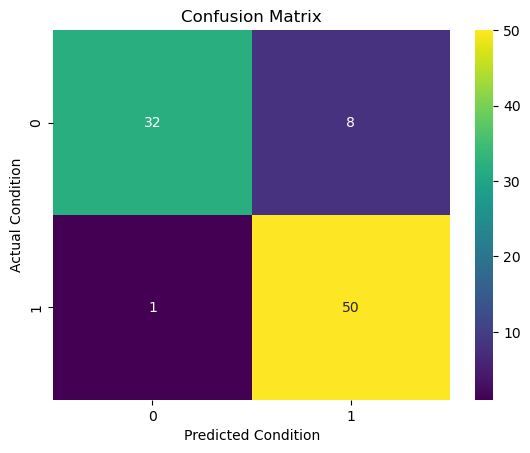

In [12]:
# Confusiom Matrix for Logistic Regression Classification Model
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_precd_LR),cmap='viridis',annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Condition')
plt.ylabel('Actual Condition')
plt.show()


### **Random Forest Classifier**

In [13]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_predict_RF = RF.predict(X_test)

accuracy_score_RF = accuracy_score(y_test,y_predict_RF)

accuracy_score_RF

0.9010989010989011

In [14]:
# Classification Report for Random Forest Model

print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87        40
           1       0.85      1.00      0.92        51

    accuracy                           0.90        91
   macro avg       0.93      0.89      0.90        91
weighted avg       0.92      0.90      0.90        91



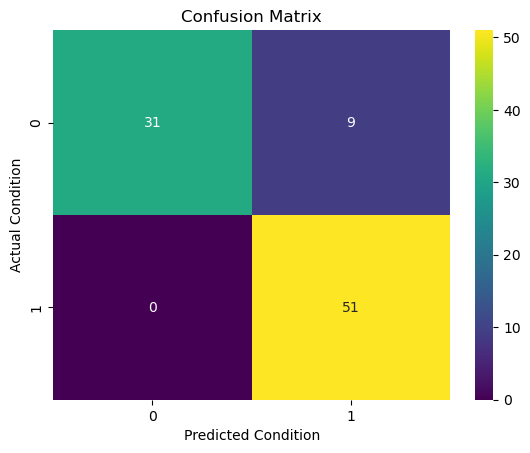

In [15]:
# Confusiom Matrix for Random Forest Classification Model

sns.heatmap(confusion_matrix(y_test,y_predict_RF),cmap='viridis',annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Condition')
plt.ylabel('Actual Condition')
plt.show()

In [16]:
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()

XGB.fit(X_train,y_train)

y_pred_XGB = XGB.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score_XGB = accuracy_score(y_pred_XGB,y_test)
accuracy_score_XGB

0.8461538461538461

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(XGB, X_train, y_train, cv= 10, scoring= 'accuracy')

print('Accuracy for each fold : ', scores)
print('Average Accuracy across 10 folds : ', np.mean(scores))

Accuracy for each fold :  [0.82608696 0.86956522 0.73913043 0.82608696 0.82608696 0.82608696
 0.91304348 0.73913043 0.81818182 0.90909091]
Average Accuracy across 10 folds :  0.8292490118577074
